In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
import re
import string

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
df = pd.read_csv("twittersentimentdataset.csv")


In [6]:
df

,tweet_id,tweet_text,sentiment,user_location,likes,retweets
0,1,I love this product!!! 😍 Totally worth the pri...,positive,India,120.0,25.0
1,2,Worst experience ever... very disappointed 😡,negative,USA,45.0,10.0
2,3,"The service was okay, nothing special.",neutral,UK,NaN,NaN
3,4,@company your support team is amazing! Thanks 💯,positive,India,200.0,60.0
4,5,I waited for hours and got no response. Terrib...,negative,NaN,15.0,3.0
5,6,"Just a normal day, nothing new.",neutral,USA,NaN,NaN
6,7,Absolutely fantastic performance by the team!,positive,UK,180.0,40.0
7,8,This app crashes again and again!!! @support,negative,India,30.0,NaN
8,9,"Not bad, but could be better.",neutral,NaN,NaN,NaN
9,10,"Loved the UI, very smooth and user friendly 😊",positive,USA,320.0,90.0


In [7]:
df.head()

,tweet_id,tweet_text,sentiment,user_location,likes,retweets
0,1,I love this product!!! 😍 Totally worth the pri...,positive,India,120.0,25.0
1,2,Worst experience ever... very disappointed 😡,negative,USA,45.0,10.0
2,3,"The service was okay, nothing special.",neutral,UK,NaN,NaN
3,4,@company your support team is amazing! Thanks 💯,positive,India,200.0,60.0
4,5,I waited for hours and got no response. Terrib...,negative,NaN,15.0,3.0


In [8]:
df.tail()

,tweet_id,tweet_text,sentiment,user_location,likes,retweets
46,47,Works fine for me.,neutral,NaN,NaN,NaN
47,48,Highly impressed with the service 💯,positive,USA,310.0,92.0
48,49,Bad experience overall.,negative,India,16.0,4.0
49,50,Neither good nor bad.,neutral,UK,NaN,NaN
50,60,Great performance and smooth experience!,positive,India,290.0,83.0


In [9]:
df.shape

(51, 6)

In [10]:
df.size


306

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       51 non-null     int64  
 1   tweet_text     51 non-null     object 
 2   sentiment      51 non-null     object 
 3   user_location  42 non-null     object 
 4   likes          35 non-null     float64
 5   retweets       34 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.5+ KB


In [12]:
df.dtypes

tweet_id           int64
tweet_text        object
sentiment         object
user_location     object
likes            float64
retweets         float64
dtype: object

In [16]:
df.describe()

,tweet_id,likes,retweets
count,51.000000,35.000000,34.000000
mean,26.176471,136.085714,36.882353
std,15.218023,122.693873,36.354121
min,1.000000,10.000000,2.000000
25%,13.500000,25.000000,6.000000
50%,26.000000,95.000000,21.500000
75%,38.500000,235.000000,63.750000
max,60.000000,410.000000,130.000000


In [17]:
df.isnull().sum()


tweet_id          0
tweet_text        0
sentiment         0
user_location     9
likes            16
retweets         17
dtype: int64

In [18]:
df = df.dropna(subset=['tweet_text', 'sentiment'])
df = df.drop_duplicates()


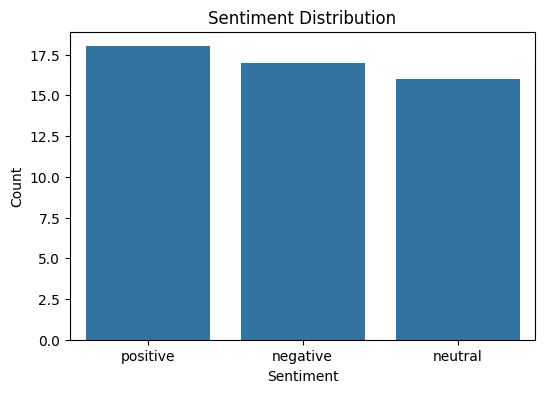

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


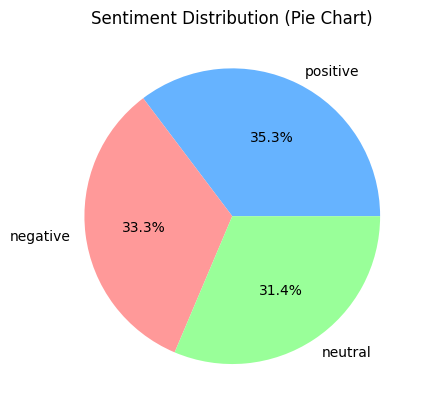

In [20]:
# Pie chart
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999','#99ff99'])
plt.title('Sentiment Distribution (Pie Chart)')
plt.ylabel('')
plt.show()

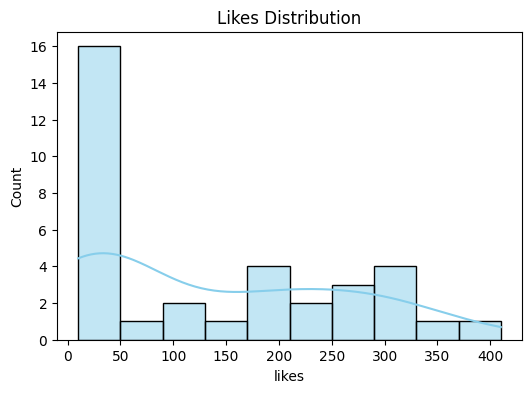

In [21]:
# Histogram of likes
plt.figure(figsize=(6,4))
sns.histplot(df['likes'].dropna(), bins=10, kde=True, color='skyblue')
plt.title('Likes Distribution')
plt.show()

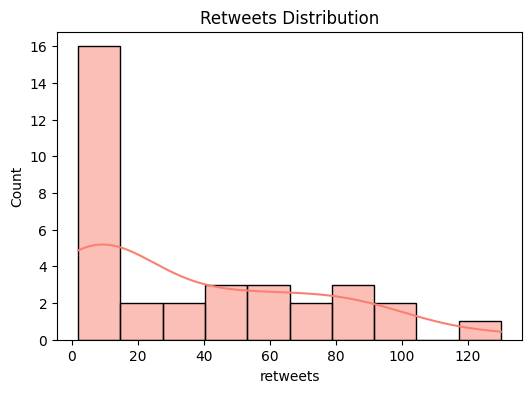

In [22]:
# Histogram of retweets
plt.figure(figsize=(6,4))
sns.histplot(df['retweets'].dropna(), bins=10, kde=True, color='salmon')
plt.title('Retweets Distribution')
plt.show()

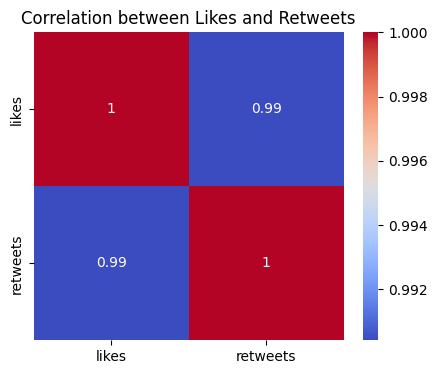

In [23]:
# Heatmap for correlation between likes and retweets
plt.figure(figsize=(5,4))
sns.heatmap(df[['likes','retweets']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Likes and Retweets')
plt.show()


In [24]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/subhashitajagtap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/subhashitajagtap/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
#clean tweet_text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'http\S+|@\S+|#\S+|[^A-Za-z\s]', '', text)  # remove links, mentions, hashtags, punctuation
    text = text.lower()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['tweet_text'].apply(clean_text)


In [26]:
#TF-IDF Vectorizer:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['sentiment']


In [27]:
#traintestsplit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression Accuracy: 0.5454545454545454
              precision    recall  f1-score   support

    negative       0.67      0.67      0.67         3
     neutral       1.00      0.40      0.57         5
    positive       0.33      0.67      0.44         3

    accuracy                           0.55        11
   macro avg       0.67      0.58      0.56        11
weighted avg       0.73      0.55      0.56        11



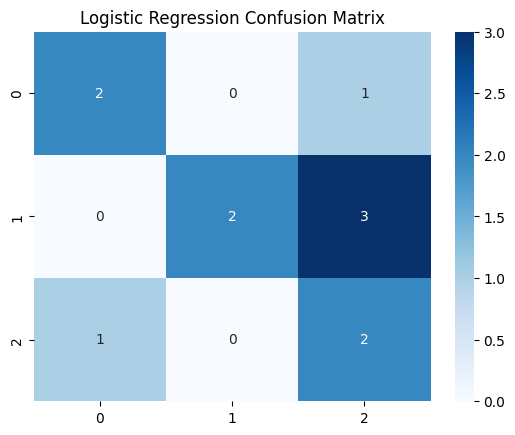

In [28]:
#logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()



In [32]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Example: if your trained objects are:
# lr = trained Logistic Regression model
# vectorizer = fitted TfidfVectorizer

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(lr, f)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

